# Multi-class classification without ImageDataAugmentation

Dataset: MNIST Hand-writing digits

MNIST: 60,000 images, 28x28 handwriting digists. 
- Conv 3x3
- Max Pooling 2x2
- Flatten 
- Dense 128
- Dense 10

Expected output: 99.8%

## 1. Prepare data

In [24]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
import matplotlib.pyplot as plt
import numpy as np

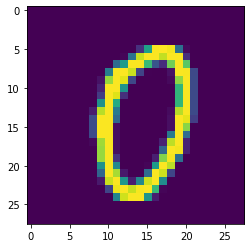

In [26]:
plt.imshow(train_images[1000])

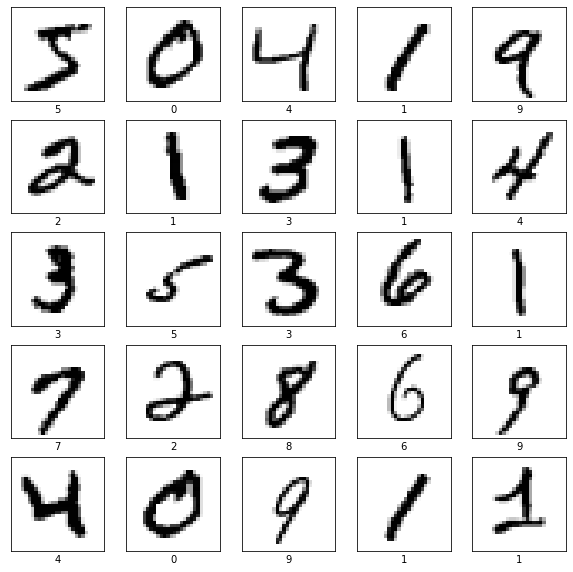

In [27]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index

    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [28]:
testing_images, testing_labels = test_images, test_labels

Check the input

In [29]:
train_images.shape #only 3 dimension, need to be converted to 4 with number_of_images, (dimension), channels

(60000, 28, 28)

In [30]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [31]:
no_train_images, train_height, train_width = train_images.shape
train_images = train_images.reshape(no_train_images, train_height, train_width, 1)
train_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [32]:
no_test_images, test_height, test_width = test_images.shape
test_images = test_images.reshape(no_test_images, test_height, test_width, 1)
test_images.shape

(10000, 28, 28, 1)

In [33]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, MaxPooling2D, Conv2D, Dropout

In [67]:
model = Sequential()

# Conv2D is for image.
"""
1. Conv2D:
  Take the mean of the each block
  a. INPUT:
    32 is for CIFAR images
    3, 3 is the dimension of the convo layer

    activation= 'relu': linear function that will output the input directly if 
                        it is positive, otherwise, it will output zero.

    input_shape = (batches (usually left blank), height, width, channels)

  b. OUTPUT:
    output_shape = (None, 26, 26, 32) is after deducting the conv2d filter
    param = input_channels * (window_size + 1) = 32 * (3*3+1)
"""
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))


"""
2. MAXPOOLING:
  Take the maximum of each block
  a. INPUT
    2, 2 is the dimension of each block

  b. OUTPUT
    (None, 13, 13, 32)  = (batch_size, heigh, width, depth). 
    Depth is taken from the depth of conv2d layer

    Param = 0 because this is not a layer to be learned

"""
model.add(MaxPooling2D((2, 2)))

"""
3. FLATTEN:
  Convert layers into a single-line column.

  a. OUTPUT: 
  5408 = 13 * 13 * 32

  Param = 0 because this is not a layer to be learned.
"""

model.add(Flatten())

"""
4. DENSE:
  Convert layers into a single-line column.

  a. OUTPUT: 
  Dense to 128 

  Param = (128+1)*5408 = 692352 params to learn
"""
model.add(Dense(128, activation='relu'))

"""
5. DROPOUT
Instead of ImageDataGenerator, we use Dropout to prevent overfit

"""

model.add(Dropout(0.5))

"""
5. DENSE:
  Convert layers into a single-line column.

  a. OUTPUT: 
  Dense to 10 (for 10 classes) 

  Param = 10*(128+1) = 1290 params to learn
"""
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


Generalize Data

In [68]:
# Adam will base on derivative size to auto fine-tune learning rate

#adam is most optimized
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) #sparse_categorical_crossentropy works effitively with multi-class classification, not with one-hot. 

In [69]:
# epoch - to run over the whole datataset at once too low epoch -> underfit, too high epoch -> overfit
# Batch - iteration. I
"""
In generalLarger batch sizes result in faster progress in training, 
but don't always converge as fast. Smaller batch sizes train slower, 
but can converge faster. It's definitely problem dependent.
"""
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1422 - acc: 0.9579 - val_loss: 0.0556 - val_acc: 0.9807
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0494 - acc: 0.9850 - val_loss: 0.0407 - val_acc: 0.9859
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0416 - val_acc: 0.9861
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0192 - acc: 0.9940 - val_loss: 0.0419 - val_acc: 0.9862
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0440 - val_acc: 0.9873
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0387 - val_acc: 0.9897
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - acc: 0.9976 - val_loss: 0.0474 - val_acc: 0.9872
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

## Save the model

In [70]:
model.save('final_model_digit.h5')

## Print the accucary

In [82]:
_, acc = model.evaluate(test_images, test_labels, verbose=0)
print('Accuracry: {:.2f}'.format(acc * 1000))

Accuracry: 98.60


## Plot the model

313/313 - 1s - loss: 0.0537 - acc: 0.9875


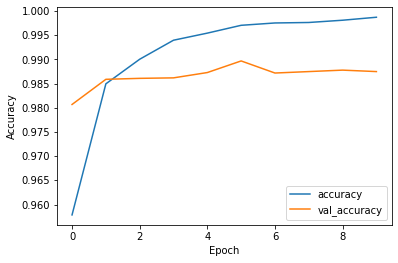

In [72]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

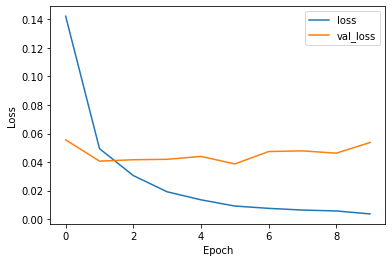

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='upper right')

In [75]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

model = load_model('final_model_digit.h5')

Text(0.5, 0, '1')

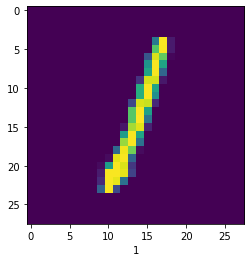

In [76]:
TEST_NUM = 7000
plt.imshow(testing_images[TEST_NUM])
plt.xlabel(class_names[testing_labels[TEST_NUM]])

In [77]:
def predict_image_from_array(image_array, class_names): 
  input_image = image_array.reshape(1, 28, 28, 1)
  input_image = input_image.astype('float32')
  input_image = input_image / 255.0
  predictions = model.predict(input_image)
  score = tf.nn.sigmoid(predictions[0])

  return class_names[np.argmax(score)]

In [78]:
testing_images[TEST_NUM]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 104, 254,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 187, 253,  18,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [79]:
predict_image_from_array(testing_images[TEST_NUM], class_names) 

'1'